<a href="https://colab.research.google.com/github/AhmadFadlulloh23/Machine_Learning/blob/main/Ahmad_Fadlulloh_LeNetMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama :Ahmad Fadlulloh

NIM : 1103213040

Tugas : Week 11 LeNet MNIST

Dataset : MNIST

https://chatgpt.com/share/c6e3c65e-6c4a-4664-afcd-c3585c8eb651

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalisasi data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [ ]:
# Model LeNet
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 22s 44ms/step - loss: 0.3287 - accuracy: 0.9027 - val_loss: 0.0866 - val_accuracy: 0.9745
Epoch 2/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0859 - accuracy: 0.9740 - val_loss: 0.0534 - val_accuracy: 0.9834
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0625 - accuracy: 0.9812 - val_loss: 0.0478 - val_accuracy: 0.9845
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0521 - accuracy: 0.9839 - val_loss: 0.0497 - val_accuracy: 0.9829
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0340 - val_accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0348 - val_accuracy:

313/313 [==============================] - 2s 5ms/step


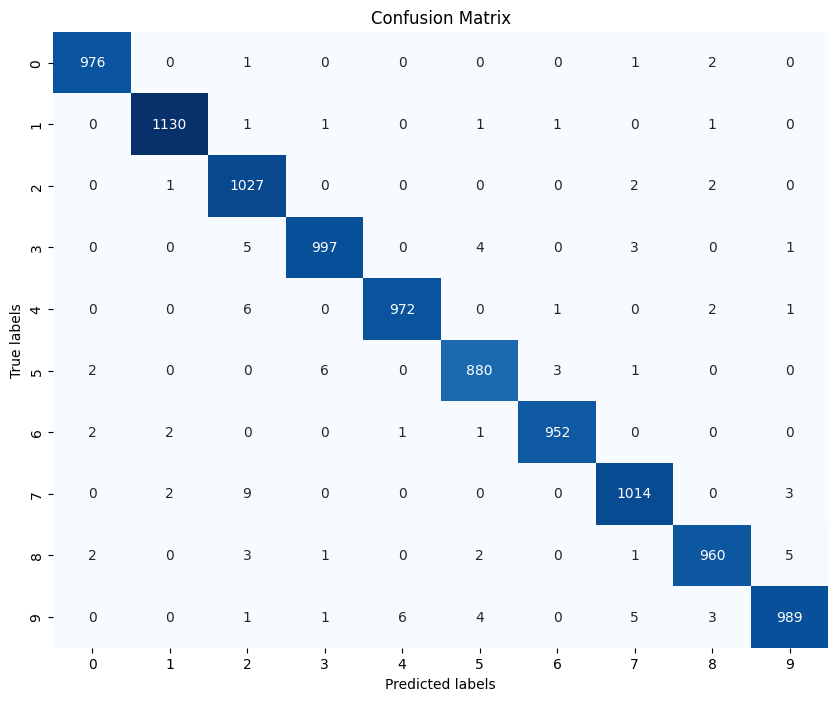

In [ ]:
# Prediksi label kelas untuk data uji
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

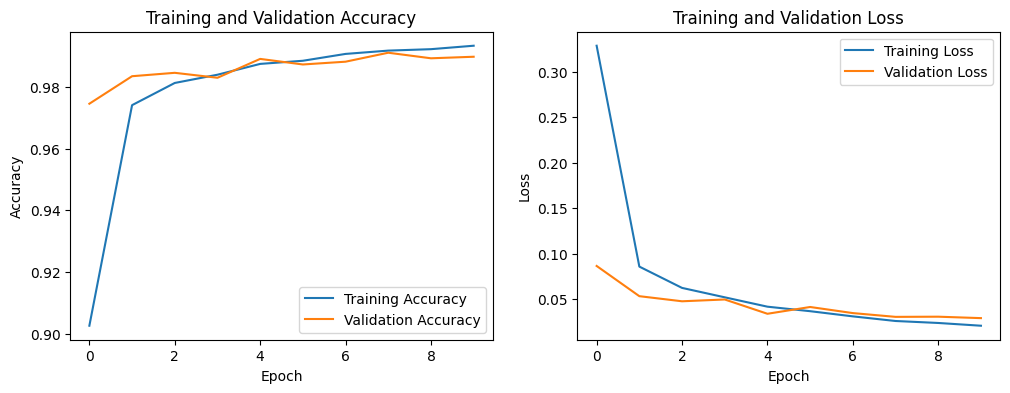

In [ ]:
# Menampilkan kurva akurasi dan loss
plt.figure(figsize=(12, 4))

# Plot kurva akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot kurva loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()